In [1]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

#設定seaborn為預設繪圖library
sns.set()

In [2]:
#讀檔
dataset = pd.read_csv('train.csv')
dataset.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


0    187437
1     58288
Name: Is_Lead, dtype: int64


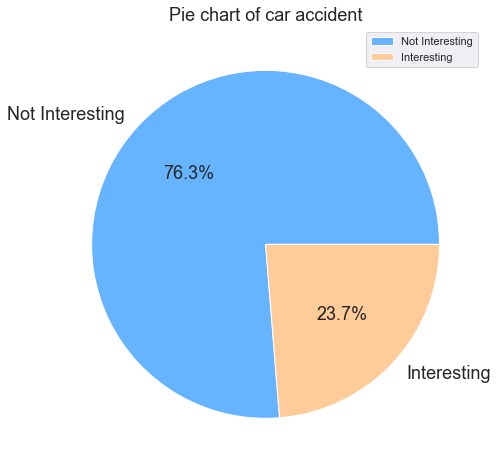

In [3]:
plt.figure(figsize = (12,8))
print(dataset['Is_Lead'].value_counts())
colors = ['#66b3ff','#ffcc99']

plt.pie(dataset['Is_Lead'].value_counts(), 
        labels = ['Not Interesting','Interesting'], 
        autopct='%.1f%%',
        colors= colors,
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 18})# 文字大小
plt.legend(loc = "best")
plt.title("Pie chart of car accident", {"fontsize" : 18})  # 設定標題及其文字大小

plt.show()

## 1. Credit_Product去掉空值

In [4]:
dataset = dataset.dropna(axis=0, how='any')

In [5]:
dataset.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [6]:
#取log使其較符合常態分佈

dataset['Avg_Account_Balance'] = np.log(dataset['Avg_Account_Balance'])


# 設定預測目標變數與解釋變數

In [7]:
#設定預測目標變數與解釋變數
dataset_data = dataset.drop('Is_Lead', axis = 1)
dataset_target = dataset['Is_Lead']

#Survived為series，加入[]轉成dataframe
dataset_target2 = dataset[['Is_Lead']]

dataset_data.shape, dataset_target2.shape

((216400, 10), (216400, 1))

In [8]:
#去除ID和Region_Code
features_drop = ['ID', 'Region_Code']
dataset_data = dataset_data.drop(features_drop, axis = 1)

In [9]:
dataset_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,Other,X3,43,No,13.860193,No
1,Female,30,Salaried,X1,32,No,13.274205,No
2,Female,56,Self_Employed,X3,26,No,14.210464,Yes
3,Male,34,Salaried,X1,19,No,13.061453,No
4,Female,30,Salaried,X1,33,No,13.695360,No


In [10]:
# 取數值＆類別的欄位
data_num_cols = dataset_data._get_numeric_data().columns 
data_cat_cols = dataset_data.columns.difference(data_num_cols)

print("Numeric columns: ", data_num_cols)
print()
print("Categorical columns: ", data_cat_cols)

Numeric columns:  Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')

Categorical columns:  Index(['Channel_Code', 'Credit_Product', 'Gender', 'Is_Active', 'Occupation'], dtype='object')


In [11]:
#區分數值＆類別資料

data_num_data = dataset_data.loc[:, data_num_cols]
data_cat_data = dataset_data.loc[:, data_cat_cols]

print("Shape of num data:", data_num_data.shape)
print("Shape of cat data:", data_cat_data.shape)

Shape of num data: (216400, 3)
Shape of cat data: (216400, 5)


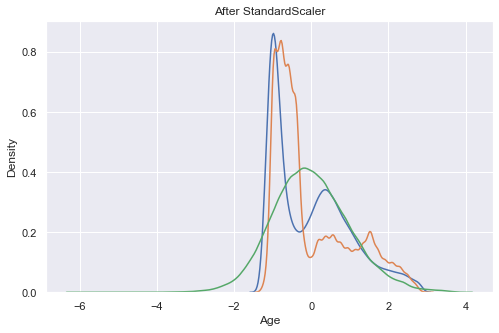

In [12]:
#利用StandardScaler標準化

from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()

data_num_data_s = s_scaler.fit_transform(data_num_data)

data_num_data_s = pd.DataFrame(data_num_data_s, columns = data_num_cols)

fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 5))
ax1.set_title('After StandardScaler')

sns.kdeplot(data_num_data_s['Age'], ax=ax1)
sns.kdeplot(data_num_data_s['Vintage'], ax=ax1)
sns.kdeplot(data_num_data_s['Avg_Account_Balance'], ax=ax1);

In [13]:
dataset_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,Other,X3,43,No,13.860193,No
1,Female,30,Salaried,X1,32,No,13.274205,No
2,Female,56,Self_Employed,X3,26,No,14.210464,Yes
3,Male,34,Salaried,X1,19,No,13.061453,No
4,Female,30,Salaried,X1,33,No,13.695360,No


## 類別轉數值

In [14]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data_cat_data = data_cat_data.apply(LabelEncoder().fit_transform)

In [15]:
data_num_data_s.reset_index(drop=True, inplace=True)
data_cat_data.reset_index(drop=True, inplace=True)
#df = pd.concat([df1, df2], axis=1)

data_new = pd.concat([data_num_data_s, data_cat_data], axis = 1)

In [16]:
data_new.head()

,Age,Vintage,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,Is_Active,Occupation
0,2.033046,-0.041156,0.225681,2,0,0,0,1
1,-0.862390,-0.393322,-0.718039,0,0,0,0,2
2,0.888339,-0.585412,0.789784,2,0,0,1,3
3,-0.593047,-0.809518,-1.060670,0,0,1,0,2
4,-0.862390,-0.361307,-0.039779,0,0,0,0,2


## 用SMOTE拆分

In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(data_new, dataset_target2)

In [44]:
X_sm.head()

,Age,Vintage,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,Is_Active,Occupation
0,2.033046,-0.041156,0.225681,2,0,0,0,1
1,-0.862390,-0.393322,-0.718039,0,0,0,0,2
2,0.888339,-0.585412,0.789784,2,0,0,1,3
3,-0.593047,-0.809518,-1.060670,0,0,1,0,2
4,-0.862390,-0.361307,-0.039779,0,0,0,0,2


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)


## XGBoost (最後選擇的模型)

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, plot_roc_curve, auc
from sklearn.metrics import make_scorer


In [20]:
xgb_model = XGBClassifier(n_estimators = 300)
xgb_model.fit(X_train, y_train)

predicted_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, predicted_xgb)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

/Users/kainie56560005/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kainie56560005/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:02:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.68%


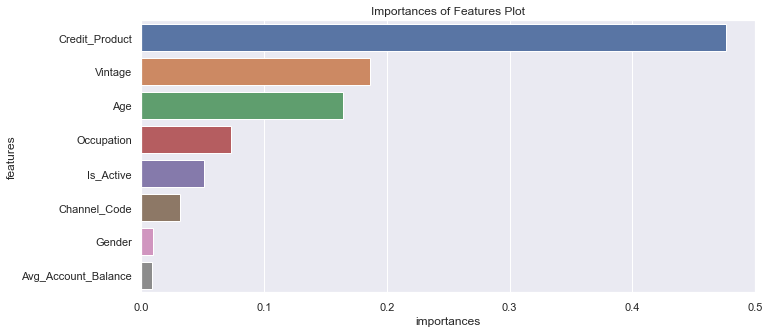

In [21]:
df_trains= X_train
df_plot = pd.DataFrame({'features': df_trains.columns [df_trains.columns != 'Is_Lead'],
                        'importances': xgb_model.feature_importances_})

df_plot = df_plot.sort_values('importances', ascending=False)
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [22]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, predicted_xgb, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     36618
           1       0.95      0.86      0.90     36617

    accuracy                           0.91     73235
   macro avg       0.91      0.91      0.91     73235
weighted avg       0.91      0.91      0.91     73235



# 其他模型比較

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

In [24]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
dt_predicted = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predicted)
print("Accuracy: %.2f%%" % (dt_accuracy * 100.0))



Accuracy: 86.54%


In [26]:
print(classification_report(y_test, dt_predicted, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     36618
           1       0.86      0.87      0.87     36617

    accuracy                           0.87     73235
   macro avg       0.87      0.87      0.87     73235
weighted avg       0.87      0.87      0.87     73235



### Random Forest

In [27]:
from sklearn import ensemble

In [28]:
rf_model = ensemble.RandomForestClassifier(n_estimators=1000)
rf_model.fit(X_train, y_train)

<ipython-input-28-add39c0fda75>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [45]:
rf_predicted = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predicted)
print("Accuracy: %.2f%%" % (rf_accuracy * 100.0))

Accuracy: 89.05%


In [30]:
print(classification_report(y_test, rf_predicted, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     36618
           1       0.88      0.90      0.89     36617

    accuracy                           0.89     73235
   macro avg       0.89      0.89      0.89     73235
weighted avg       0.89      0.89      0.89     73235



## LigthGBM

In [31]:
import lightgbm as lgb

lgbm_model = lgb.sklearn.LGBMClassifier()
lgbm_model.fit(X_train, y_train)

lgbm_predicted = lgbm_model.predict(X_test)

lgbm_accuracy = accuracy_score(y_test, lgbm_predicted)
print("Accuracy: %.2f%%" % (lgbm_accuracy * 100.0))


/Users/kainie56560005/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 88.79%


In [32]:
print(classification_report(y_test, lgbm_predicted, target_names=target_names))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     36618
           1       0.90      0.87      0.89     36617

    accuracy                           0.89     73235
   macro avg       0.89      0.89      0.89     73235
weighted avg       0.89      0.89      0.89     73235



## KNN

In [33]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

# 建立分類器
knn_model = neighbors.KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
# 預測
knn_predicted = knn_model.predict(X_test)



# 標準答案
knn_accuracy = accuracy_score(y_test, knn_predicted)
print("Accuracy: %.2f%%" % (knn_accuracy * 100.0))

<ipython-input-33-2f218a4c0269>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(X_train, y_train)


Accuracy: 84.83%


In [34]:
print(classification_report(y_test, knn_predicted, target_names=target_names))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     36618
           1       0.82      0.90      0.86     36617

    accuracy                           0.85     73235
   macro avg       0.85      0.85      0.85     73235
weighted avg       0.85      0.85      0.85     73235



## Logistic

In [35]:
from sklearn import preprocessing, linear_model
from sklearn.linear_model  import LogisticRegression


In [36]:
# 建立分類器
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# 預測
logistic_predicted = logistic_model.predict(X_test)

# 標準答案
logistic_accuracy = accuracy_score(y_test, logistic_predicted)
print("Accuracy: %.2f%%" % (logistic_accuracy * 100.0))

/Users/kainie56560005/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 70.04%


In [37]:
print(classification_report(y_test, logistic_predicted, target_names=target_names))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69     36618
           1       0.69      0.72      0.71     36617

    accuracy                           0.70     73235
   macro avg       0.70      0.70      0.70     73235
weighted avg       0.70      0.70      0.70     73235



## AUC Curve

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [39]:
#首先我们使用建立好的模型对测试集数据进行预测预测的概率
score_xgb = xgb_model.predict_proba(X_test)[:,1]
score_dt = dt_model.predict_proba(X_test)[:,1]
score_rf = rf_model.predict_proba(X_test)[:,1]
score_lgbm = lgbm_model.predict_proba(X_test)[:,1]
score_knn = knn_model.predict_proba(X_test)[:,1]
score_logistic = logistic_model.predict_proba(X_test)[:,1]



#使用roc_curve方法得到三个模型的真正率TP,假正率FP和阈值threshold
fpr_xgb, tpr_xgb, thres_xgb = roc_curve(y_test, score_xgb,)
fpr_dt, tpr_dt, thres_dt = roc_curve(y_test, score_dt,)
fpr_rf, tpr_rf, thres_rf = roc_curve(y_test, score_rf,)
fpr_lgbm, tpr_lgbm, thres_lgbm = roc_curve(y_test, score_lgbm,)
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, score_knn,)
fpr_logistic, tpr_logistic, thres_logistic = roc_curve(y_test, score_logistic,)

print("XGB 的AUC為:", auc(fpr_xgb, tpr_xgb))
print("DT 的AUC為:", auc(fpr_dt, tpr_dt))
print("RF 的AUC為:", auc(fpr_rf, tpr_rf))
print("LGBM 的AUC為:", auc(fpr_lgbm, tpr_lgbm))
print("KNN 的AUC為:", auc(fpr_knn, tpr_knn))
print("Logistic 的AUC為:", auc(fpr_logistic, tpr_logistic))


XGB 的AUC為: 0.9579472061699746
DT 的AUC為: 0.8653734870098043
RF 的AUC為: 0.9562956632244443
LGBM 的AUC為: 0.9484460851625941
KNN 的AUC為: 0.8483246018078742
Logistic 的AUC為: 0.769316481662745


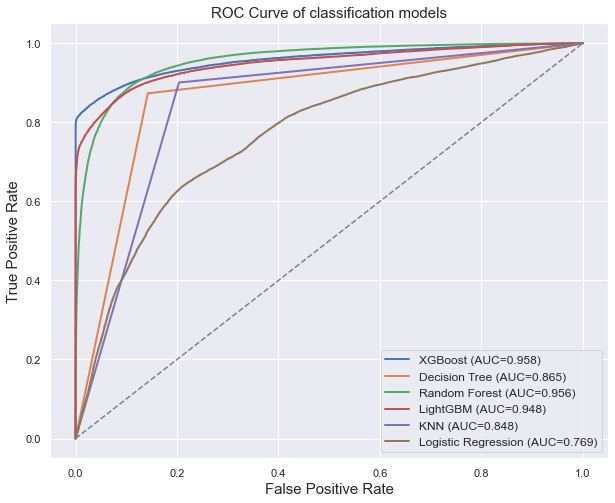

In [40]:
fig,ax = plt.subplots(figsize=(10,8))

#自定义标签名称label=''
ax.plot(fpr_xgb, tpr_xgb, linewidth=2,
        label='XGBoost (AUC={})'.format(str(round(auc(fpr_xgb, tpr_xgb), 3))))

ax.plot(fpr_dt, tpr_dt, linewidth=2,
        label='Decision Tree (AUC={})'.format(str(round(auc(fpr_dt, tpr_dt), 3))))

ax.plot(fpr_rf, tpr_rf, linewidth=2,
        label='Random Forest (AUC={})'.format(str(round(auc(fpr_rf, tpr_rf), 3))))

ax.plot(fpr_lgbm, tpr_lgbm, linewidth=2,
        label='LightGBM (AUC={})'.format(str(round(auc(fpr_lgbm, tpr_lgbm), 3))))

ax.plot(fpr_knn, tpr_knn, linewidth=2,
        label='KNN (AUC={})'.format(str(round(auc(fpr_knn, tpr_knn), 3))))

ax.plot(fpr_logistic, tpr_logistic, linewidth=2,
        label='Logistic Regression (AUC={})'.format(str(round(auc(fpr_logistic, tpr_logistic), 3))))


#绘制对角线
ax.plot([0,1],[0,1],linestyle='--',color='grey')

#调整字体大小
plt.legend(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve of classification models', fontsize=15)

plt.savefig('ROC.png')
plt.show()
